## __Machine Learning & Obesity Levels__

### INFO 1998 Final Project
Ty Smith, Ariel Vilensky

### Project Goal

By using data analysis and machine learning techniques taught in INFO 1998, we intend to answer:

1. Which features are most important for distinguishing between obesity levels?
2. Which classification algorithms perform best on this dataset?
3. Which obesity types are confused most with others?

These questions will be explored and answered using data visualization, data manipulation, and classification models.

### Sources

Our dataset, titled "Estimation of Obesity Levels Based On Eating Habits and Physical Condition" comes from the UCI Machine Learning Repository and includes data for estimating obesity levels in individuals from the countries of Mexico, Peru, and Colombia.

It can be found here: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

***


## __Data Exploration and Visualization__

First, lets take a look at our features:

| Feature | Type | Description |
|---------|------|-------------|
| Gender | Categorical | -- |
| Age | Continuous | -- |
| Height | Continuous | -- |
| Weight | Continuous | -- |
| family_history_with_overweight | Binary | -- |
| FAVC | Binary | Frequently eat high calorie foods? |
| FCVC | Integer | Frequency of vegetables in meals|
| NCP | Continuous | Number of main meals a day (breakfast, lunch, dinner) |
| CAEC | Categorical | Frequency of food between meals (snacks) |
| SMOKE | Binary | Does the subject smoke? |
| CH2O | Continuous | Daily water intake |
| SCC | Binary | Does the subject monitor daily caloric intake?|
| FAF | Continuous | Frequency of physical activity |
| TUE | Integer | Hours spent on technology |
| CALC | Categorical | Frequency of drinking |
| MTRANS | Categorical | Main transportation method |

Now, our target variable that we intend to predict:

| Target | Type | Description |
|---------|------|-------------|
| NObeyesdad | Categorical | Obesity Level |

NObeyesdad covers seven categories, determined by:
$$Mass\ body\ index = \frac{Weight}{height \times height}$$
Where it is then divided into,

1. Insufficient_Weight
2. Normal_Weight
3. Overweight_Level_I
4. Overweight_Level_II
5. Obesity_Type_I
6. Obesity_Type_II
7. Obesity_Type_III

depending on the MBI ratio. 


To understand our data better, we must now to visualize some of this data; first as a dataframe in pandas, then as charts or graphs using seaborn and matplotlib.

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')
df.head() #Take a peek at our data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [224]:
df.describe() #Take a look at some basic analytics

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Lucky enough, our data also seems to have no null/missing values!

In [225]:
df.isnull().sum() #Check for missing values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Now lets look at some interesting visualizations.

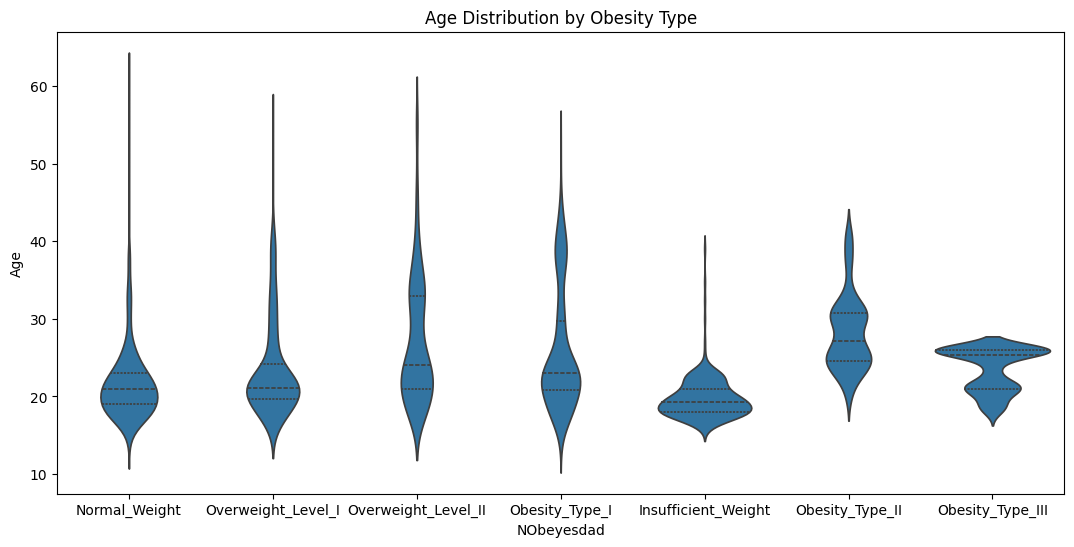

In [226]:
# To see how certain obesity types vary within age ranges, lets create a violin plot.
plt.figure(figsize=(13, 6))
sns.violinplot(x='NObeyesdad', y='Age', data=df, inner='quartile')
plt.title('Age Distribution by Obesity Type')
plt.show()

Some interesting takeaways from this plot: most categories are concentrated in the 20s age range, and the distributions overlap significantly. Age may not be a good indicator of obesity alone.

Next, we'll take a look at how physical activity relates to obesity type:

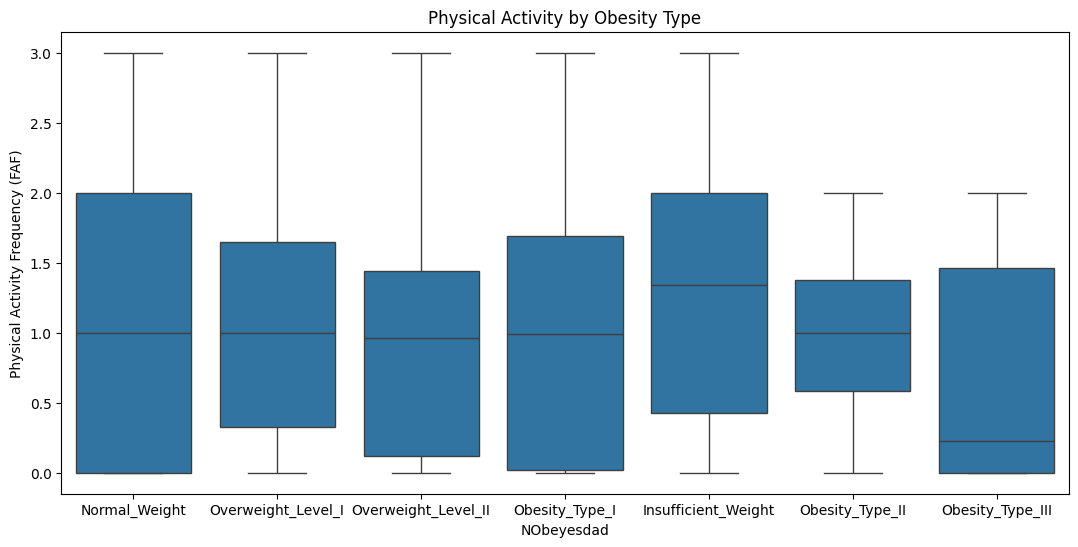

In [227]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='NObeyesdad', y='FAF', data=df)
plt.ylabel('Physical Activity Frequency (FAF)')
plt.title('Physical Activity by Obesity Type')
plt.show()

This plot makes sense, with insufficient and normal weights having relatively high medians and higher obesity levels having limited exercise. 

It might help us to see how evenly distributed our NObeyesdad categories are, next:

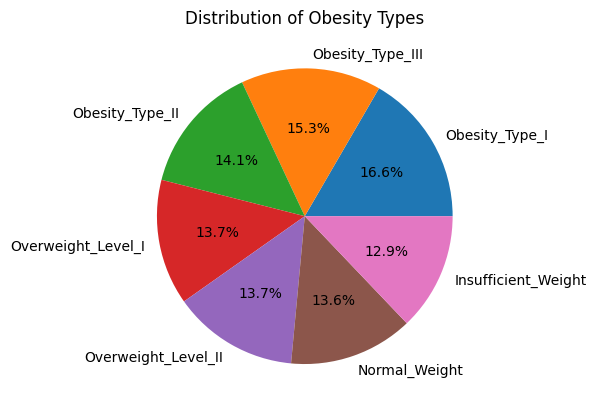

In [228]:
# Visualize the distribution of obesity types
obesity_counts = df['NObeyesdad'].value_counts()
plt.pie(obesity_counts.values, labels=obesity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Obesity Types')
plt.show()

It is clear that our classes are quite balanced from this pie chart, with each category accounting for roughly 14% of NObeyesdad. While we know the categories are divvied up depending on the mass body index, it might help us to know just what these classes mean in terms of height and weight.

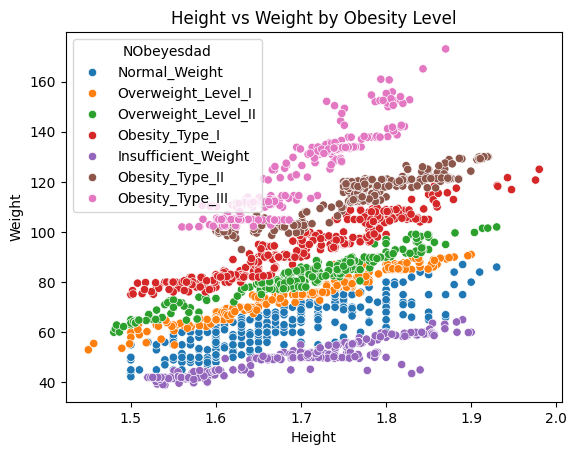

In [229]:
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df)
plt.title('Height vs Weight by Obesity Level')
plt.show()

From this, we can visually confirm that the MBI formula makes sense, as it clearly separates obesity types based on height and weight, as the formula stated. Though MBI = weight over height squared, the height range is too narrow to see the quadratic effect of the data.

***

## __Model Predictions__

To predict NObeyesdad (obesity level), we choose to use four classifiers covered in class: Logistic Regression, Random Forest, Support Vector Machine (SVM) and K-Nearest Neighbors (KNN).

Before we do anything, our data needs to be preprocessed for our models. For binary features, we'll numerically encode them as 0s or 1s.

In [230]:
df['Gender'] = (df['Gender'] == 'Male').astype(int) #0 if female, 1 if male
df['family_history_with_overweight'] = (df['family_history_with_overweight'] == 'yes').astype(int) #0 if no history, 1 if family history
df['FAVC'] = (df['FAVC'] == 'yes').astype(int) # 1 if they frequently eat high caloric foods
df['SMOKE'] = (df['SMOKE'] == 'yes').astype(int) #1 if they smoke
df['SCC'] = (df['SCC'] == 'yes').astype(int) #1 if they monitor calories, 0 otherwise

For our multi-class categorical data, we need to create dummy columns:

In [231]:
df = pd.get_dummies(df, columns=['CAEC'], drop_first=False, dtype=int)
df = pd.get_dummies(df, columns=['CALC'], drop_first=False, dtype=int)
df = pd.get_dummies(df, columns=['MTRANS'], drop_first=False, dtype=int)

__Now we are ready to separate the data into train and test sets!__

In [232]:
#define features
X = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 
        'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
        'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
        'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
        'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 
        'MTRANS_Public_Transportation', 'MTRANS_Walking']]
#define target
Y = df['NObeyesdad']

In [233]:
## Import SKlearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Lets first train and predict using our logistic regression model.

In [234]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(x_train, y_train)

train_predictions = logistic_regression.predict(x_train)
test_predictions = logistic_regression.predict(x_test)

print("Test Accuracy: ", accuracy_score(y_test, test_predictions))
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))

Test Accuracy:  0.8274231678486997
Training Accuracy:  0.8489336492890995


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It seems our model has performed quite well, with both test and training accuracy being in the low 80s.

In [235]:
#next, we create a random forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

# make predictions
train_predictions_rf = random_forest.predict(x_train)
test_predictions_rf = random_forest.predict(x_test)

#evaluate
print("Test Accuracy: ", accuracy_score(y_test, test_predictions_rf))
print("Training Accuracy: ", accuracy_score(y_train, train_predictions_rf))

Test Accuracy:  0.9574468085106383
Training Accuracy:  1.0



Our random forest model seems to do very well, even avoiding overfitting with a small gap between the perfect training accuracy and near-perfect test-accuracy. 

To answer question 1, where we ask which features are the most important in determining obesity levels, we can use our random forest to rank feature importance:

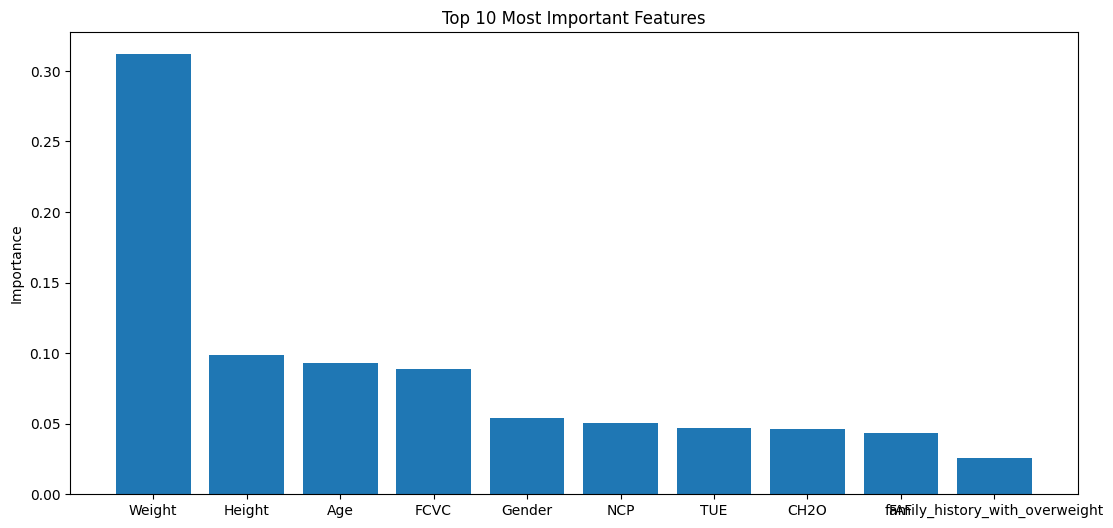

In [236]:
# Get feature importances from Random Forest
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': random_forest.feature_importances_
}).sort_values('importance', ascending=False)


#create bar chart
plt.figure(figsize=(13, 6))
top_10 = feature_importances.head(10)
plt.bar(range(len(top_10)), top_10['importance'])
plt.xticks(range(len(top_10)), top_10['feature'])
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.show()

From this graph, we can see that our random forest did a good job of learning the Mass body index formula, emphasizing height and weight most heavily, while including some behavioral factors and age.

It is also interesting to see frequency of vegetable consumption (FCVC) as an important feature, which made us wonder, can we predict obesity type using only behavioral/controllable factors?

In [237]:
# # define behavioral features only 
X_behavioral = df[['FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
                   'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
                   'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
                   'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 
                   'MTRANS_Public_Transportation', 'MTRANS_Walking']]


x_train_behavioral, x_test_behavioral, y_train_behavioral, y_test_behavioral = train_test_split(X_behavioral, Y, test_size=0.2, random_state=42)

rf_behavioral = RandomForestClassifier(random_state=42)
rf_behavioral.fit(x_train_behavioral, y_train_behavioral)

train_pred_behavioral = rf_behavioral.predict(x_train_behavioral)
test_pred_behavioral = rf_behavioral.predict(x_test_behavioral)

# Compare accuracies
print(f"Behavioral Features Test Accuracy: {accuracy_score(y_test_behavioral, test_pred_behavioral)}")
print(f"Behavioral Features Training Accuracy: {accuracy_score(y_train_behavioral, train_pred_behavioral)}")
print()
print(f"Original Test Accuracy: {accuracy_score(y_test, test_predictions_rf)}")
print(f"Original Training Accuracy: {accuracy_score(y_train, train_predictions_rf)}")

Behavioral Features Test Accuracy: 0.7612293144208038
Behavioral Features Training Accuracy: 0.990521327014218

Original Test Accuracy: 0.9574468085106383
Original Training Accuracy: 1.0


From this we can see that behavioral features alone can achieve meaningful predictive power with 76% testing accuracy-- far better than just randomly guessing. This suggests that factors like water consumption, vegetable intake, and physical activity are associated with obesity levels in our dataset.

Still, the large gap between our training and testing accuracy (99%, 76%) indicates overfitting, meaning our new Random Forest model struggles to generalize to new data.

For the most accurate obesity prediction, its important to include physical measurments, though lifestyle factors provide useful input.

__Lets take a look at some other classifiers on our original test and training sets next.__

For our SVM and KNN models, we must scale our data by using StandardScaler's z-score normalization.

In [238]:
#scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Now lets train our SVM model:

In [239]:
#train svm
svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train)

#predict
train_predictions_svm = svm_model.predict(x_train_scaled)
test_predictions_svm = svm_model.predict(x_test_scaled)

print("Test Accuracy: ", accuracy_score(y_test, test_predictions_svm))
print("Training Accuracy: ", accuracy_score(y_train, train_predictions_svm))

Test Accuracy:  0.851063829787234
Training Accuracy:  0.9164691943127962


Finally, lets train our KNN model:

In [240]:
#train our KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

#predict using KNN
train_predictions_knn = knn_model.predict(x_train_scaled)
test_predictions_knn = knn_model.predict(x_test_scaled)

#accuracies
print("Test Accuracy: ", accuracy_score(y_test, test_predictions_knn))
print("Training Accuracy: ", accuracy_score(y_train, train_predictions_knn))

Test Accuracy:  0.817966903073286
Training Accuracy:  0.8744075829383886


### Model Comparison

To answer question 2 (which classification models perform best?), lets compare the accuracies of the four models using a bar chart:

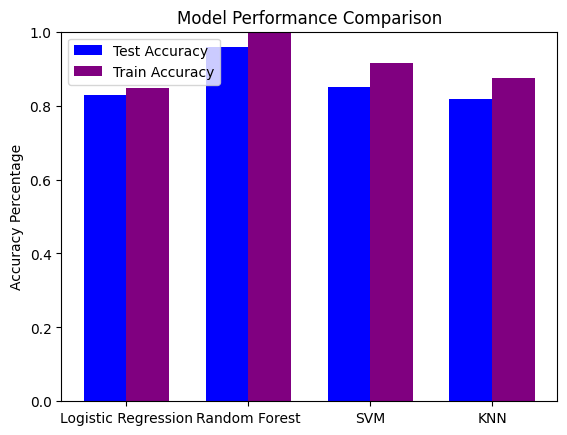

In [241]:
# recalculate accuracies and store in lists
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
test_accuracies = [
    accuracy_score(y_test, test_predictions),
    accuracy_score(y_test, test_predictions_rf),
    accuracy_score(y_test, test_predictions_svm),
    accuracy_score(y_test, test_predictions_knn)
]
train_accuracies = [
    accuracy_score(y_train, train_predictions),
    accuracy_score(y_train, train_predictions_rf),
    accuracy_score(y_train, train_predictions_svm),
    accuracy_score(y_train, train_predictions_knn)
]

# visualize 
x = range(len(models))
width = 0.35
plt.bar([i - width/2 for i in x], test_accuracies, width, label='Test Accuracy', color='blue')
plt.bar([i + width/2 for i in x], train_accuracies, width, label='Train Accuracy', color='purple')
plt.ylabel('Accuracy Percentage')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1.0)
plt.legend()
plt.show()

With these results, we can tell that all of our models performed well, with the random forest being the standout best. Test and train accuracy for all four were similar, indicating low bias, low variance, and no major overfitting.

### Confusion Matrix Analysis

To answer question 3 (which obesity types are confused most with others?), we'll create a confusion matrix using our best model, the Random Forest:

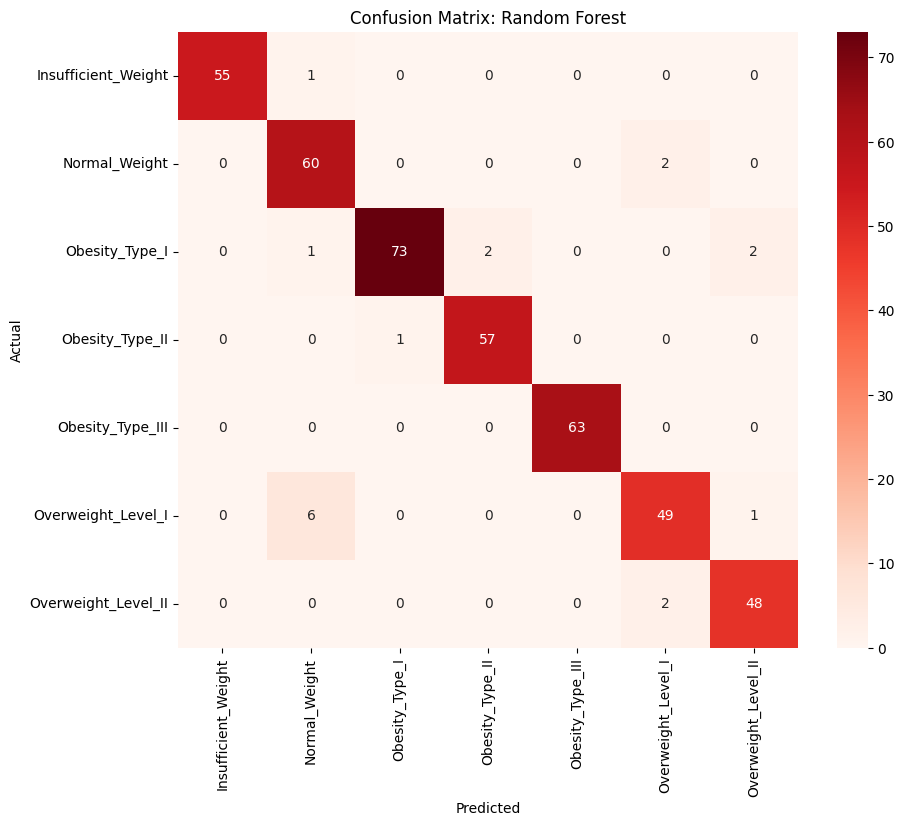

In [242]:
#create confusion matrix
cm = confusion_matrix(y_test, test_predictions_rf)

#visualize using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()

From this heatmap, we can say that there was minimal confusion, but there were some misclassifications between Normal_Weight and Overweight_Level_I as well as Overweight_Level_II and its level 1 variant. This all makes sense as these are adjacent categories which don't differ that much by features.

Similarly, our model was very accurate with the extremes--insufficient weight and obesity type III--because they are very distinct.

***


## __Conclusion__

Our project successfully demonstrated data visualization, manipulation, and analysis techniques as well as machine learning predictions using a UCI obesity prediction dataset. 

We began by exploring our data through visualizations including violin plots, box plots, scatter plots, and pie charts. These revealed that our dataset has balanced classes (~14% each), obesity types separated clearly by height and weight (as expected from the MBI formula), and that age alone isn't a strong indicator of obesity. Physical activity frequency showed expected patterns across obesity categories.

After preprocessing our data with numerical encoding and dummy columns, we trained four classification models: Logistic Regression, Random Forest, SVM, and KNN. This allowed us to answer our three research questions:

**1. Which features are most important for distinguishing between obesity levels?**

From our Random Forest feature importance analysis, weight, height, and age were the top predictors, which makes sense given that obesity categories are defined by MBI. Interestingly, behavioral factors like vegetable consumption frequency (FCVC) and physical activity (FAF) also ranked highly. Our behavioral-features-only model achieved 76% accuracy, demonstrating that lifestyle factors show meaningful associations with obesity levels, though not as strongly as physical measurements.

**2. Which classification algorithms perform best on this dataset?**

Random Forest achieved the best performance with near-perfect test accuracy (~96%), followed by SVM and KNN, with Logistic Regression performing slightly worse but still well (~82%). All models showed similar training and testing accuracies, indicating good generalization without significant overfitting.

**3. Which obesity types are confused most with others?**

The confusion matrix showed that misclassifications primarily occurred between adjacent categories-- such as Normal_Weight and Overweight_Level_I, or between the different Overweight levels. This makes sense since these neighboring categories have similar MBI ranges. The model performed very accurately on the extremes (Insufficient_Weight and Obesity_Type_III) due to their distinct characteristics.

Overall, this project effectively applied machine learning techniques learned in INFO 1998 to health data classification. While physical measurements remain the strongest predictors of obesity levels (since they directly define MBI), our analysis revealed that behavioral factors have meaningful associations with obesity outcomes and could potentially be useful for screening or risk assessment.